# Gradient Descent Example

## Gradient Descent

* Consider you have a dataset with $m$ examples and want to fit a model using Linear Regression

* In Gradient Descent we want to find the parameter vector $\theta$ that minimize the cost function $J$:

\begin{equation} J(\theta) =  \frac{1}{2} \sum_{j=1}^{m} (y^j - h_\theta(x^j))^2 \end{equation}

* The algorithm consists in updating, for each feature $i = 1, ..., n-1$, the parameter values:

\begin{equation} \theta' = \theta - \alpha \frac{\partial J(\theta)}{\partial \theta_i} \end{equation}

* Where $\alpha$ is the learning rate, that represents how much the parameters will change in the direction of the gradient

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Dataset

* The dataset we will work with consists in data points distributed over a linear equation with some added noise:


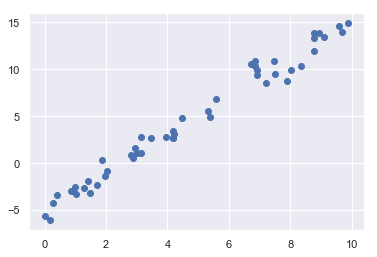

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

* Here we have a linear function. Therefore the model can be given by:

\begin{equation} h_\theta(x) =  \theta_1 \cdot x + \theta_2 \end{equation}

* Lets change the notation for something easier. Instead of $\theta$ lets use $a$ and $b$:

\begin{equation} h(x) =  a \cdot x + b \end{equation}

* Then the cost function becomes:

\begin{equation} J(a,b) =  \frac{1}{m} \sum_{j=1}^{m} (y^j - (ax^j + b))^2 \end{equation}

* The gradient can be calculated as:

\begin{equation}
J'(a,b) =
   \begin{bmatrix}
     \frac{dJ}{da}\\
     \frac{dJ}{db}\\
    \end{bmatrix}
=
   \begin{bmatrix}
     \frac{1}{m} \sum -2x^j(y^j - (ax^j + b)) \\
     \frac{1}{m} \sum -2(y^j - (ax^j + b)) \\
    \end{bmatrix}
\end{equation}

In [3]:
def cost_function(x, y, a, b):
    m = len(x)
    total_error = 0.0
    for i in range(m):
        total_error += (y[i] - (a*x[i] + b))**2
    return total_error / m

def update_parameters(a, b, X, Y, learning_rate):
    a_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # Calculate partial derivatives
        a_deriv += -2*X[i] * (Y[i] - (a*X[i] + b))
        b_deriv += -2*(Y[i] - (a*X[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    a -= (a_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return a, b

## Fitting the model
* Now that the algorithm is implemented we can run fit our parameters

iter=0    a=2.39    b=0.2681    cost=5e+01
iter=20    a=1.66    b=-1.3978    cost=5.6
iter=40    a=1.67    b=-2.4866    cost=2.7
iter=60    a=1.76    b=-3.2384    cost=1.7
iter=80    a=1.84    b=-3.7640    cost=1.3

 Training is done


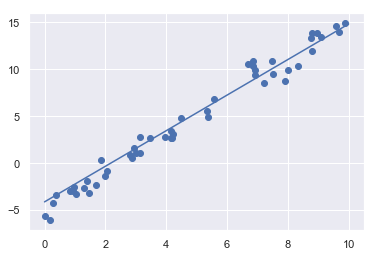

In [4]:
#Initialize the parameters
a = 0
b = 0
learning_rate = 0.03

cost_history = [] #to keep track of the cost evolotion

for i in range(100):
    (a, b) = update_parameters(a, b, x, y, learning_rate)
    cost = cost_function(x, y, a, b)
    cost_history.append(cost)
    if i % 20 == 0:
        print("iter={:d}    a={:.2f}    b={:.4f}    cost={:.2}".format(i, a, b, cost))

print('\n Training is done')

#lets see the result
xfit = np.linspace(0, 10, 1000)
yfit = a*xfit + b

plt.scatter(x, y)
plt.plot(xfit, yfit);

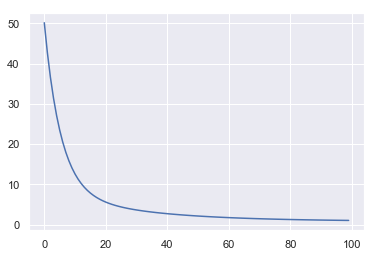

In [5]:
#Here we can see how the cost evolved with time
plt.plot(cost_history);

## How does `learning_rate` affect the algorithm?

* Firstly, lets try to decrease the learning rate

iter=0    a=0.08    b=0.0089    cost=5.3e+01
iter=20    a=0.94    b=0.0774    cost=1.2e+01
iter=40    a=1.18    b=0.0523    cost=8.7
iter=60    a=1.25    b=0.0026    cost=8.3
iter=80    a=1.27    b=-0.0532    cost=8.1

 Training is done


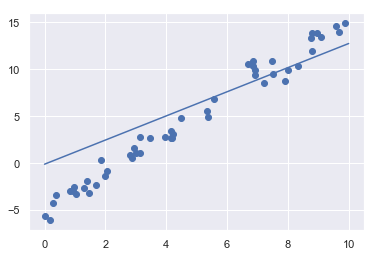

In [6]:
#Initialize the parameters
a = 0
b = 0
learning_rate = 0.001

cost_history = [] #to keep track of the cost evolotion

for i in range(100):
    (a, b) = update_parameters(a, b, x, y, learning_rate)
    cost = cost_function(x, y, a, b)
    cost_history.append(cost)
    if i % 20 == 0:
        print("iter={:d}    a={:.2f}    b={:.4f}    cost={:.2}".format(i, a, b, cost))

print('\n Training is done')

#lets see the result
xfit = np.linspace(0, 10, 1000)
yfit = a*xfit + b

plt.scatter(x, y)
plt.plot(xfit, yfit);

* If the learning rate allows the algorithm to converge faster, why not to increase it?
* Answer: Convergence problems


iter=0    a=39.76    b=4.4680    cost=4.8e+04
iter=20    a=23091875953765383014478344355840.00    b=3497293751032588307013241405440.0000    cost=1.7e+64
iter=40    a=13927881537446111348077566022599509549601741561610651771600896.00    b=2109395233352175371314807448376123991614041940963711160156160.0000    cost=6.3e+123
iter=60    a=8400611735033196731842689049926367428883021608343750371076040851259018750740358486038675456.00    b=1272283247346648835433019695515741637779485526409022880029665051968596509378071284991131648.0000    cost=2.3e+183
iter=80    a=5066834990881000051923368866972365308624557035513441315092978229567863553462283189067287843152675755423489581289828253696.00    b=767378552812289684490611509215129747101120011642011280385451946803610501912697267431372070288465532570435007064022450176.0000    cost=8.4e+242

 Training is done


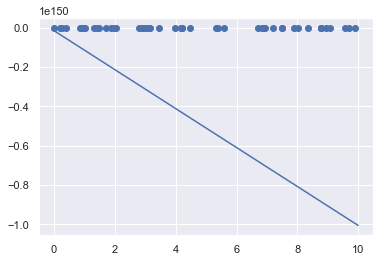

In [7]:
#Initialize the parameters
a = 0
b = 0
learning_rate = 0.5

cost_history = [] #to keep track of the cost evolotion

for i in range(100):
    (a, b) = update_parameters(a, b, x, y, learning_rate)
    cost = cost_function(x, y, a, b)
    cost_history.append(cost)
    if i % 20 == 0:
        print("iter={:d}    a={:.2f}    b={:.4f}    cost={:.2}".format(i, a, b, cost))

print('\n Training is done')

#lets see the result
xfit = np.linspace(0, 10, 1000)
yfit = a*xfit + b

plt.scatter(x, y)
plt.plot(xfit, yfit);

## Alternative: Using SKlearn library

* Instead of implementing the algorithm manually, this library provides the linear regression method out of the box
* `fit_intercept = True` means that the algorithm has to fit also the bias parameter (b in our example)

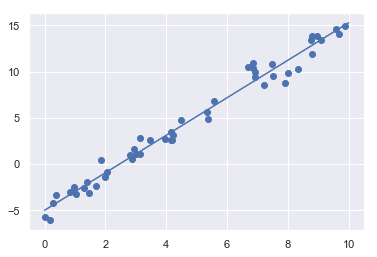

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);